In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
lemm = WordNetLemmatizer()

lines=100000

In [3]:

def create_lexicon():
    lexicon=[]
    with open('pos.txt','r') as f:
        contents = f.readlines()
        #all_words=word_tokenize(contents)
        for l in contents[:lines]:
            all_words=word_tokenize(l)
            lexicon+=list(all_words)

                
                    
            
    with open('neg.txt','r') as f:
        contents = f.readlines()
        for l in contents[:lines]:
            all_words=word_tokenize(l)
            lexicon += list(all_words)
    
    lexicon = [lemm.lemmatize(i,pos='n') for i in lexicon]
    w_counts = Counter(lexicon)
    l2 = []
    for w in w_counts:
        #print(w_counts[w])
        if 1000 > w_counts[w] > 50:
            l2.append(w)
    return l2

In [4]:
def make_features(sample,lexicon,char):
    import numpy as np
    featureset=[]
    with open(sample,'r')as f:
        contents=f.readlines()
        
        for l in contents[:lines]:
            sam_words=word_tokenize(l)
            sam_words=[lemm.lemmatize(i) for i in sam_words]
            features=np.zeros(len(lexicon))
            for word in sam_words:
                if word.lower() in lexicon:
                    index_value=lexicon.index(word.lower())
                    features[index_value]+=1
            features=list(features)
            featureset.append([features,char])
    return featureset

In [5]:
import pandas as pd
data=pd.read_csv(r"C:\Users\PIYUSH\Desktop\news.csv")

In [6]:
len(data["headline"].unique())

2873

In [7]:
news=data["text"]
headline=data["headline"]

In [16]:
#def data_prepare(headline):
head_lexicon=[[]]
j=-1
for i in headline:
    j+=1
    all_words=word_tokenize(i)
    head_lexicon.append(list(all_words))
stop = set(stopwords.words('english'))
for i in range(len(head_lexicon)):
    head_lexicon[i]=[lemm.lemmatize(j,pos='n') for j in head_lexicon[i] if j not in stop]
for i in range(len(head_lexicon)):
    head_lexicon[i]=[word.lower() for word in head_lexicon[i] if word.isalpha()]

In [25]:
headline[2]

"Election? Here's How You Do It, Mate."

In [17]:
#def data_prepare(headline):
news_lexicon=[[]]
j=-1
for i in news:
    j+=1
    all_words=word_tokenize(i)
    news_lexicon.append(list(all_words))
stop = set(stopwords.words('english'))
for i in range(len(news_lexicon)):
    news_lexicon[i]=[lemm.lemmatize(j,pos='n') for j in news_lexicon[i] if j not in stop]
for i in range(len(news_lexicon)):
    news_lexicon[i]=[word.lower() for word in news_lexicon[i] if word.isalpha()] 


[[],
 ['new',
  'york',
  'ap',
  'a',
  'prime',
  'rate',
  'reduction',
  'new',
  'york',
  'first',
  'national',
  'city',
  'bank',
  'helped',
  'stock',
  'market',
  'close',
  'busiest',
  'week',
  'history',
  'modest',
  'advance',
  'the',
  'dow',
  'jones',
  'average',
  'industrial',
  'stock',
  'gained',
  'finishing',
  'week',
  'withanetrise',
  'big',
  'board',
  'volume',
  'million',
  'share',
  'fell',
  'good',
  'deal',
  'short',
  'matching',
  'thursday',
  'high',
  'but',
  'figure',
  'enough',
  'push',
  'total',
  'week',
  'record',
  'million',
  'share',
  'the',
  'previous',
  'peak',
  'million',
  'last',
  'week',
  'january',
  'the',
  'dow',
  'advanced',
  'two',
  'first',
  'session',
  'new',
  'year',
  'as',
  'close',
  'gained',
  'point',
  'since',
  'new'],
 ['mayor',
  'anthony',
  'williams',
  'petitioned',
  'white',
  'house',
  'yesterday',
  'million',
  'federal',
  'relief',
  'five',
  'time',
  'official',
  'ori

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
stop = set(stopwords.words('english'))
head_words=[]
for i in headline:
    words=word_tokenize(i)
    lexicon=[lemm.lemmatize(j.lower(),pos='n') for j in words if j not in stop and j.isalpha()]
    word=" ".join(lexicon)
    head_words.append(word) 

tagged_data_head = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(head_words)] 


In [11]:
stop = set(stopwords.words('english'))
news_words=[]
for i in news:
    words=word_tokenize(i)
    lexicon=[lemm.lemmatize(j.lower(),pos='n') for j in words if j not in stop and j.isalpha()]
    word=" ".join(lexicon)
    news_words.append(word) 

tagged_data_news = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(news_words)] 


In [13]:
max_epochs = 100
vec_size = 50
alpha = 0.025

In [110]:
model = Doc2Vec(size=100,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data_head)

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\gensim\models\doc2vec.py:579: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [111]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data_head,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0


c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [112]:
model1 = Doc2Vec(size=100,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model1.build_vocab(tagged_data_news)

c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\gensim\models\doc2vec.py:579: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [113]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model1.train(tagged_data_news,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model1.alpha -= 0.0002
    # fix the learning rate, no decay
    model1.min_alpha = model.alpha

iteration 0


c:\users\piyush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [114]:
import numpy as np
news_vec=np.zeros(shape=[3000,100])
head_vec=np.zeros(shape=[3000,100])

In [115]:
def preprocess(sentence):
    stop = set(stopwords.words('english'))
    words=word_tokenize(sentence)
    lexicon=[lemm.lemmatize(j.lower(),pos='n') for j in words if j not in stop and j.isalpha()]
    word=" ".join(lexicon)
    return word

In [116]:
count=-1
for i in news:
    count+=1
    words=preprocess(i)
    test_data = word_tokenize(words.lower())
    v1 = model1.infer_vector(test_data)
    news_vec[count]=v1
    
    

In [117]:
count=-1
for i in headline:
    count+=1
    words=preprocess(i)
    test_data = word_tokenize(words.lower())
    v1 = model1.infer_vector(test_data)
    head_vec[count]=v1
    
    

In [118]:
X1=pd.DataFrame(news_vec)
X2=pd.DataFrame(head_vec)

In [119]:
X =pd.concat([X1, X2], axis=1,ignore_index=True)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [22.5, 22.5, 50.0, 50.0],
  [5.0, 5.0, 36.25, 36.25],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [20.625, 20.625, 74.375, 74.375],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [122.5, 122.5, 167.5, 167.5],
  [205.0, 205.0, 215.0, 215.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [243.75, 243.75, 282.5, 282.5],
  [225.0, 225.0, 263.125, 263.125],
  [210.0, 210.0, 244.0625, 244.0625],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [345.0, 345.0, 355.0, 355.0],
  [375.0, 37

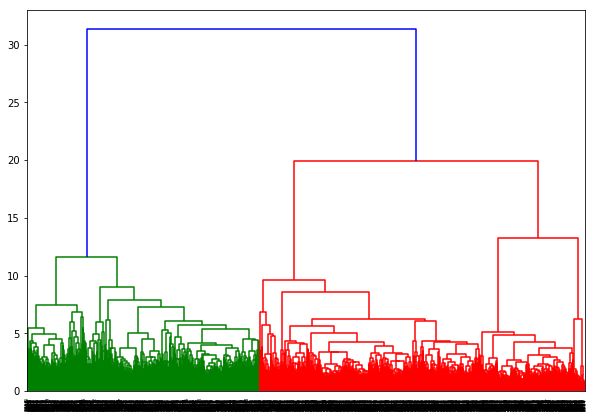

In [120]:
 
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'ward')

labelList = range(1, 3001)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)


In [121]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=50, affinity='euclidean', linkage='ward')  
pred=cluster.fit_predict(X)  

In [122]:
data1=data.copy()

In [130]:
d=np.array(X)
print(d.shape)

(3000, 200)


In [124]:
data1["cluster"]=pred

In [125]:
data1.drop(["headline"],axis=1,inplace=True)

In [126]:
data1.drop(["text"],axis=1,inplace=True)

In [101]:
df=pd.read_csv(r"C:\Users\PIYUSH\Desktop\Submit.csv")

In [127]:
data1.to_csv(r"C:\Users\PIYUSH\Desktop\Submit.csv", encoding='utf-8', index=False)

In [128]:
X.to_csv(r"C:\Users\PIYUSH\Desktop\Submit_matrix.txt", encoding='utf-8', index=False)

In [129]:
np.savetxt(r"C:\Users\PIYUSH\Desktop\Submit_matrix1.txt",d, delimiter=" ")